This is an introduction to Tensorflow 2 with the Keras API. We will work with the MNIST dataset of hand-written digits and:
*   classify them using logistic regression and multi-layer dense networks
*   examine various network depths, activation functions and optimizers
*   introduce convolutional layers and the LeNet5 architecture

Import Tensorflow, load the MNIST dataset using Tensorflow built-in tools and display some characteristics of the data and target arrays:

In [1]:
import tensorflow as tf

(DATA0, TARGET0), (DATA1, TARGET1) = tf.keras.datasets.mnist.load_data()

print(type(DATA0), DATA0.shape, DATA0.dtype, DATA0.min(), DATA0.max())
print(type(TARGET0), TARGET0.shape, TARGET0.dtype, TARGET0.min(), TARGET0.max())

print(type(DATA1), DATA1.shape, DATA1.dtype, DATA1.min(), DATA1.max())
print(type(TARGET1), TARGET1.shape, TARGET1.dtype, TARGET1.min(), TARGET1.max())

11490434/11490434 [==============================] - 2s 0us/step
<class 'numpy.ndarray'> (60000, 28, 28) uint8 0 255
<class 'numpy.ndarray'> (60000,) uint8 0 9
<class 'numpy.ndarray'> (10000, 28, 28) uint8 0 255
<class 'numpy.ndarray'> (10000,) uint8 0 9


These are ordinary numpy arrays. There are 60 000 samples in the training dataset and 10 000 in the validation dataset. The targets are integer numbers from 0 to 9 labeling the digits. The data are 28x28 grayscale images with values of type uint8, ranging from 0 to 255.

**Task.** Display the first image from the training dataset.

**Solution.** The code below displays the first digit from the training dataset:

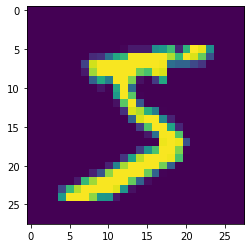

In [2]:
from matplotlib import pyplot as plt

plt.imshow(DATA0[0])

Dense networks take flat vectors of floating-point features and are best suited for inputs of the order of 1 rather than 255. So flatten the images, cast them to float32 and scale to the range from 0 to 1:

In [3]:
DATA0 = DATA0.reshape(-1, 28 * 28).astype('float32') / 255.
DATA1 = DATA1.reshape(-1, 28 * 28).astype('float32') / 255.

Suppose we have $I$ data samples of $J$ features each and want to classify them to $K$ classes. Let $X_{ij}$ denote feature $j$ of sample $i$. In logistic regression, we first calculate the logits $$A_{ik}=b_k+\sum_jX_{ij}w_{jk}$$ where $b_k$ and $w_{jk}$ are called biases and weights. Then we calculate the probabilities that sample $i$ belongs to class $k$ according to the softmax formula $$P_{ik}=\frac{\exp(A_{ik})}{\sum_{k'}\exp(A_{ik'})}$$ We then classify each sample to the class with the highest probability. The biases and weights are determined by training the classifier on a dataset $X_{ij}$ where sample $i$ belongs to class $k_i$. This is done by minimizing the cross-entropy loss $$L=-\sum_{ik}\delta_{kk_i}\log P_{ik}$$ by using a variant of stochastic gradient descent. Build the corresponding Tensorflow model. The dense layer transforms features into logits and the softmax function transforms logits to probabilities. This is a single-layer dense network with 10 outputs corresponding to digits from 0 to 9:

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()])

The activation functions, like softmax, sigmoid, relu, etc., can be treated as separate layers or equivalently added at the outputs of the dense layers:

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation = 'softmax')])

The model has not been trained yet, so it will give incorrect predictions. But anyway pass the entire validation dataset thereto and display the output:

In [12]:
PROBABILITY1 = model(DATA1)
print(PROBABILITY1)

tf.Tensor(
[[0.05167668 0.12001316 0.13359576 ... 0.16891429 0.06585174 0.10746017]
 [0.10195825 0.08277217 0.11792559 ... 0.15281254 0.10292968 0.15052103]
 [0.066366   0.07223871 0.13078341 ... 0.06768409 0.12285866 0.12955788]
 ...
 [0.05561999 0.10865445 0.16778933 ... 0.09445178 0.05930987 0.15072164]
 [0.11965018 0.17953506 0.101887   ... 0.07389995 0.05867144 0.15284973]
 [0.10085566 0.07039701 0.05637723 ... 0.19763641 0.05897344 0.19710067]], shape=(10000, 10), dtype=float32)


The output is not a numpy array but a tf.Tensor, an internal format on which Tensorflow operates. Convert it back to a numpy array for further processing:

In [13]:
PROBABILITY1 = model(DATA1).numpy()
print(PROBABILITY1)

[[0.05167668 0.12001316 0.13359576 ... 0.16891429 0.06585174 0.10746017]
 [0.10195825 0.08277217 0.11792559 ... 0.15281254 0.10292968 0.15052103]
 [0.066366   0.07223871 0.13078341 ... 0.06768409 0.12285866 0.12955788]
 ...
 [0.05561999 0.10865445 0.16778933 ... 0.09445178 0.05930987 0.15072164]
 [0.11965018 0.17953506 0.101887   ... 0.07389995 0.05867144 0.15284973]
 [0.10085566 0.07039701 0.05637723 ... 0.19763641 0.05897344 0.19710067]]


**Task.** Each row of this array contains 10 probabilities of the sample representing digits from 0 to 9. Check if these probabilities sum up to one.

**Solution.** This code displays the probabilities summed over columns. The sums equal one up to numerical precision:

In [14]:
SUM1 = PROBABILITY1.sum(1)
print(SUM1)

[1.0000001 1.        0.9999999 ... 1.0000001 1.        1.       ]


**Task.** Run the code again from where the model is constructed and inspect the resulting probabilities. Why are these probabilities different every time the code is run? How does this relate to scaling the inputs to the range from 0 to 1?

**Solution.** The probabilities are different because the model weights are randomly initialized each time the model is constructed. This random initialization is designed for inputs of the order of 1 rather than 255. 

**Task.** Given the probabilities, calculate the digits to which the samples are classified.

**Solution.** For each sample, the code below chooses the digit with the maximum probability:

In [15]:
LABEL1 = PROBABILITY1.argmax(1)
print(LABEL1)

[7 7 3 ... 2 1 7]


**Task.** Compare the labels from the model with the correct ones and calculate the classification accuracy.

**Solution.** This code divides the number of correctly classified samples by the total number of samples:

In [16]:
ACCURACY1 = (LABEL1 == TARGET1).mean()
print(ACCURACY1)

0.1063


**Task.** Why is this accuracy close to 0.1?

**Solution.** The model weights are initialized at random, so the classification is also random. Since there are 10 digits, the probability of randomly choosing the correct one is 1/10.

Associate the model with an optimizer, a loss function and a metric like accuracy. Here we use the simplest stochastic gradient descent (sgd) as the optimizer and sparse categorical crossentropy is just the Tensorflow name for the cross-entropy loss introduced above:

In [17]:
model.compile('sgd',
              'sparse_categorical_crossentropy',
              'accuracy')

Once the model is associated with a loss function and a metric, calculate their values on any dataset by calling a built-in method:

In [18]:
model.evaluate(DATA0, TARGET0)
model.evaluate(DATA1, TARGET1)

313/313 [==============================] - 1s 2ms/step - loss: 2.3352 - accuracy: 0.1063


[2.3352372646331787, 0.1062999963760376]

The accuracy on the validation dataset is indeed equal to what we calculated manually. Now train the model on the training dataset. Do only a few epochs for now:

In [19]:
model.fit(DATA0, TARGET0, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7769 - accuracy: 0.8156
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4581 - accuracy: 0.8804
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4048 - accuracy: 0.8912
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3780 - accuracy: 0.8966
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3611 - accuracy: 0.9004
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3490 - accuracy: 0.9037
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.9058
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3326 - accuracy: 0.9081
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3267 - accuracy: 0.9095
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.321

**Task.** The built-in training loop displays the loss and accuracy on the training dataset after each epoch and prints some other information. What does the progress bar indicate? What does the number of 1 875 stand for?

**Solution.** The progress bar indicates subsequent batches. By default, the batch size is 32 and 1 875 is the number of such batches in the 60 000 training dataset. 

The accuracy on the training dataset may not be representative for new samples due to the so-called overfitting. To get a more reliable estimation of the model accuracy, calculate it on the validation dataset. Also change the batch size and do more epochs to perform a full training:

In [20]:
model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3180 - accuracy: 0.9117 - val_loss: 0.3053 - val_accuracy: 0.9159
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3167 - accuracy: 0.9118 - val_loss: 0.3040 - val_accuracy: 0.9171
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3155 - accuracy: 0.9125 - val_loss: 0.3033 - val_accuracy: 0.9176
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3142 - accuracy: 0.9126 - val_loss: 0.3022 - val_accuracy: 0.9174
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3132 - accuracy: 0.9128 - val_loss: 0.3012 - val_accuracy: 0.9174
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3121 - accuracy: 0.9132 - val_loss: 0.3006 - val_accuracy: 0.9168
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3110 - accuracy: 0.9134 - val_loss: 0.2996 - val_accuracy: 0.9180

**Task.** With the batch of 100, a single epoch executes roughly twice faster than with the default batch of 32. Why? What may be the other consequences of changing the batch size from 32 to 100?

**Solution.** Even though the batch of 100 is 3 times larger than the default batch of 32, Tensorflow is optimized so that processing the larger batch takes only 1.5 more time than processing the smaller one (3ms vs 2ms). But there are 3 times less large batches per epoch than there are small ones, which translates to 3 times less minimization steps. This gives 3 / 1.5 = 2 times less time per epoch with the larger batch (2s vs 4s). Less minimization steps per epoch imply that more epochs may be needed to achieve the same result. On the other hand, larger batch gives a better estimation of the real gradient so the minimization is less noisy.

Although this is not absolutely necessary, evaluate the model on the training and validation dataset:

In [21]:
model.evaluate(DATA0, TARGET0)
model.evaluate(DATA1, TARGET1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.9216


[0.27453625202178955, 0.9215999841690063]

**Task.** The validation accuracy displayed after the last training epoch is equal to the validation accuracy evaluated after completing the training. This is not the case for the accuracy on the training dataset. Why?

**Solution.** Accuracy is calculated as a mean over all batches in the concerned dataset. The validation accuracy displayed during training is calculated after completing each epoch. But the training accuracy displayed during training is not calculated in such a way, because this would require iterating over the entire training dataset after completing each epoch and could be time-consuming. Instead, the training accuracy displayed during training is calculated during the epoch. But during the epoch, a minimization step is performed after each batch, so subsequent batches correspond to different model weights. Consequently, the displayed training accuracy does not correspond to any fixed set of model weights and is only an approximation to the real accuracy on the training dataset.

In the following, by the validation accuracy of a model, we will always mean the maximum value listed during training, even if it is not in the last epoch. This is because Tensorflow can stop training after any epoch and thus produce a model with validation accuracy corresponding to that epoch. Now display a summary of the model architecture:

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**Task.** Why does the number of weights equal 7 850?

**Solution.** To produce its output, a dense layer multiplies the input by a matrix whose one dimension is the number of inputs and the other is the number of outputs. That matrix has 784 * 10 = 7 840 elements in this case. Then, the layer adds a bias to each output, so there are 10 biases. Together, there are 7 840 + 10 = 7 850 weights.

**Task.** In this example, the training and validation accuracies are very close to each other, which means that there is almost no overfitting. Why?

**Solution.** Because there are much more samples in the training dataset than there are model weights. So, the problem is overdetermined and there are not enough degrees of freedom to adjust the model too much to the training dataset.

In order to increase the overall accuracy, add a second layer. The number of neurons in that layer may be, for instance, the geometric mean of the number of inputs and outputs, that is, sqrt(10 * 784) = 89, or the next power of two, that is, 128. Use the classical sigmoid activation for this layer:

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'sigmoid'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('sgd',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 1.9568 - accuracy: 0.5534 - val_loss: 1.6128 - val_accuracy: 0.7295
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 1.3736 - accuracy: 0.7589 - val_loss: 1.1402 - val_accuracy: 0.8049
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 1.0162 - accuracy: 0.8080 - val_loss: 0.8771 - val_accuracy: 0.8290
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.8179 - accuracy: 0.8311 - val_loss: 0.7284 - val_accuracy: 0.8478
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.7006 - accuracy: 0.8453 - val_loss: 0.6357 - val_accuracy: 0.8610
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.6240 - accuracy: 0.8555 - val_loss: 0.5730 - val_accuracy: 0.8696
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.5702 - accuracy: 0.8637 - val_loss: 0.5277 - val_accuracy: 0.8756

**Task.** Explain the number of weights in this network.

**Solution.** The first layer has 784 inputs and 128 outputs, so 784 * 128 + 128 = 100 480 weights. The second layer has 128 inputs and 10 outputs, so 128 * 10 + 10 = 1 290 weights. Together, there are 100 480 + 1 290 = 101 770 weights.

Adding the second layer improved the accuracy surprisingly little. Change the activation function of the added layer to relu, which is one of the most used:

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('sgd',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 1.0754 - accuracy: 0.7359 - val_loss: 0.5685 - val_accuracy: 0.8637
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4941 - accuracy: 0.8742 - val_loss: 0.4131 - val_accuracy: 0.8932
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4005 - accuracy: 0.8923 - val_loss: 0.3586 - val_accuracy: 0.9047
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3584 - accuracy: 0.9017 - val_loss: 0.3300 - val_accuracy: 0.9099
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3325 - accuracy: 0.9077 - val_loss: 0.3089 - val_accuracy: 0.9150
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3138 - accuracy: 0.9124 - val_loss: 0.2944 - val_accuracy: 0.9202
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2989 - accuracy: 0.9169 - val_loss: 0.2821 - val_accuracy: 0.9235

Now the improvement is very significant. The difference is because sigmoid saturates on both sides, yields vanishing gradients there, and effectively stucks the minimization. Relu does not saturate on the positive side and causes no such problems.

**Task.** The training takes less physical time with the relu activation. Why?

**Solution.** Relu does not contain nonlinear functions, like exponents, and is therefore faster to calculate and differentiate.

Now switch the optimizer to Adam, which is one of the best and most used:

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 0.3314 - accuracy: 0.9081 - val_loss: 0.1735 - val_accuracy: 0.9507
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1517 - accuracy: 0.9566 - val_loss: 0.1221 - val_accuracy: 0.9630
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1074 - accuracy: 0.9688 - val_loss: 0.1088 - val_accuracy: 0.9649
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0825 - accuracy: 0.9757 - val_loss: 0.0847 - val_accuracy: 0.9753
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0659 - accuracy: 0.9811 - val_loss: 0.0916 - val_accuracy: 0.9723
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0537 - accuracy: 0.9842 - val_loss: 0.0818 - val_accuracy: 0.9754
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0441 - accuracy: 0.9878 - val_loss: 0.0781 - val_accuracy: 0.9761

The final validation accuracy is only slightly higher but Adam achieved it in a much smaller number of epochs than SGD. From now on, we will always use the Adam optimizer and the relu activation function. It is impressive that such a simple two-layer network correctly classifies 100% of the training dataset. This means that the lower accuracy on the validation dataset is uniquely due to overfitting.

**Task.** Why is there a significant overfitting here?

**Solution.** Because the number of model weights is significantly higher than the number of training samples. The problem is now underdetermined and gives room for excessive adjustment of the model weights to this particular training dataset.

**Task.** Since there is overfitting caused by the already large number of model weights, it is dubious whether adding a third layer would still improve things, because it will increase the number of weights even more. Check this by adding a third layer. Adjust the layer sizes, the batch size, and the number of epochs to obtain a maximum validation accuracy.

**Solution.** The code below gives validation accuracy higher than 0.9850, on a good day:

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2659 - accuracy: 0.9230 - val_loss: 0.1255 - val_accuracy: 0.9606
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1036 - accuracy: 0.9691 - val_loss: 0.0845 - val_accuracy: 0.9734
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0687 - accuracy: 0.9792 - val_loss: 0.0859 - val_accuracy: 0.9737
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0490 - accuracy: 0.9849 - val_loss: 0.0719 - val_accuracy: 0.9773
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0699 - val_accuracy: 0.9806
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0718 - val_accuracy: 0.9785
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0801 - val_accuracy: 0.9766

Adding the third layer improved the validation accuracy only slightly. But this is still an achievement because the closer we are to 100%, the more difficult it is to gain accuracy. Note that even a slight increase in accuracy leads to a significant reduction in the error rate, which is complementary to accuracy. Here for instance, increasing the accuracy from 0.980 to 0.985 reduces the error rate from 2% to 1.5%, that is, by a factor of 4/3.

**Task.** Check that adding a fourth dense layer does not further increase the validation accuracy.

**Solution.** This code trains a four-layer network and achieves the same validation accuracy as with three layers:

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2425 - accuracy: 0.9277 - val_loss: 0.1130 - val_accuracy: 0.9645
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0892 - accuracy: 0.9727 - val_loss: 0.0812 - val_accuracy: 0.9748
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0768 - val_accuracy: 0.9752
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0419 - accuracy: 0.9865 - val_loss: 0.0724 - val_accuracy: 0.9793
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0695 - val_accuracy: 0.9805
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0705 - val_accuracy: 0.9812
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0779 - val_accuracy: 0.9784

Since adding more dense layers does not further increase the validation accuracy, we must resort to other means. There are dedicated techniques to reduce overfitting, but it seems more interesting to introduce convolutional layers. First, load the data once again:

In [28]:
(DATA0, TARGET0), (DATA1, TARGET1) = tf.keras.datasets.mnist.load_data()

Convolutional layers require the data to be four-dimensional, with the subsequent dimensions being the batch size, the image height, the image width, and the number of channels. The number of channels equals three for RGB images and one for grayscale images. We deal with grayscale images but still the fourth dimension needs to be added with the size of one:

In [29]:
DATA0 = DATA0[:, :, :, None].astype('float32') / 255.
DATA1 = DATA1[:, :, :, None].astype('float32') / 255.

Construct a convolutional layer, pass some data through it, convert the output to a numpy array, and print its shape:

In [30]:
layer = tf.keras.layers.Conv2D(8, 5, activation = 'relu')

OUTPUT1 = layer(DATA1).numpy()
print(OUTPUT1.shape)

(10000, 24, 24, 8)


This sample convolutional layer has 8 output channels, which means that it produces an output with 8 channels. It also has a filter of size 5, which means that every output pixel is a linear combination of input pixels in a 5x5 square. Consequenntly, the layer reduces the image size by 4 in each dimension, from 28 to 24 in this case. In order to perform image classification, the output from the convolutional layer must be flattened and passed to a dense layer with softmax activation:

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 5, activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 4s 4ms/step - loss: 0.2984 - accuracy: 0.9196 - val_loss: 0.1156 - val_accuracy: 0.9671
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0998 - accuracy: 0.9710 - val_loss: 0.0792 - val_accuracy: 0.9767
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0710 - accuracy: 0.9790 - val_loss: 0.0634 - val_accuracy: 0.9806
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0655 - val_accuracy: 0.9797
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0597 - val_accuracy: 0.9813
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0529 - val_accuracy: 0.9853
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0563 - val_accuracy: 0.9837

**Task.** Why does the covolutional layer have 208 weights?

**Solution.** The output in each channel is produced by a 5x5 filter which has 5 * 5 = 25 weights. There are 8 channels, so 8 * 25 = 200 weights. A bias is added for each output channel, so there are 200 + 8 = 208 weights altogether.

**Task.** Why does the total number of weights equal 46 298?

**Solution.** The convolutional layer yields 8 channels of 24x24 pixels each, so it has 8 * 24 * 24 = 4 608 outputs. The dense layer has 4 608 inputs and 10 outputs, so 4 608 * 10 + 10 = 46 090 weights. In total, there are 46 090 + 208 = 46 298 weights.

This two-layer model with 46 298 weights is almost as good the three-layer dense model with 218 058 weights! This is partly because convolutional layers have very little weights, so they are less prone to overfitting than dense layers. Convolutional networks frequently use pooling layers that reduce the spatial image size twice in each direction by retaining only the pixel with maximum activation from each 2x2 square. Pooling acts independently in each channel. Add pooling after the convolutional layer:

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 5, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4065 - accuracy: 0.8903 - val_loss: 0.1824 - val_accuracy: 0.9477
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1615 - accuracy: 0.9539 - val_loss: 0.1201 - val_accuracy: 0.9645
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1142 - accuracy: 0.9677 - val_loss: 0.0958 - val_accuracy: 0.9712
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0939 - accuracy: 0.9722 - val_loss: 0.0816 - val_accuracy: 0.9760
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0816 - accuracy: 0.9758 - val_loss: 0.0713 - val_accuracy: 0.9784
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0726 - accuracy: 0.9786 - val_loss: 0.0686 - val_accuracy: 0.9793
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0647 - accuracy: 0.9808 - val_loss: 0.0614 - val_accuracy: 0.9811

**Task.** Examine the total number of weights in this network.

**Solution.** The pooling layer reduces the number of inputs to the dense layer four times, which reduces the number of its weights almost four times as well. Since the dense layer contributes to the total number of weights much more than the convolutional layer, pooling reduces their total number almost four times. This makes the whole network less susceptible to overfitting.

Pooling inevitably looses some information, so the current network has worse validation accuracy, but only a bit worse. Convolutional networks are often built of pairs of convolutional and pooling layers. Add another such pair:

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 5, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16, 5, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 0.3666 - accuracy: 0.8991 - val_loss: 0.1195 - val_accuracy: 0.9633
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1101 - accuracy: 0.9670 - val_loss: 0.0815 - val_accuracy: 0.9744
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0836 - accuracy: 0.9753 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0671 - accuracy: 0.9798 - val_loss: 0.0540 - val_accuracy: 0.9839
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0573 - accuracy: 0.9832 - val_loss: 0.0449 - val_accuracy: 0.9861
Epoch 6/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0430 - val_accuracy: 0.9861
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0390 - val_accuracy: 0.9877

**Task.** How to explain the 3 216 weights in the second convolutional layer?

**Solution.** This layer has 8 input channels and 16 output channels. In such a case, each output channel is a sum over all input channels. Thus, the number of weights equals the number of input channels times the filter size times the number of output channels plus one bias per output channel. This amounts to 8 * 5 * 5 * 16 + 16 = 3 216 in this case.

Each pair of convolutional and pooling layers reduces the spatial image size more than four times. It is a common practice to inrease the number of output channels twice in each subsequent convolutional layer, as we did. In this way, each pair reduces the number of features roughly twice. This in turn significantly reduces the number of weights in the final dense layer and in the entire net, thus making it less and less overfitting. This network has less weights than any previous one, and yet this is the first time that the validation accuracy exceeds 99%.

**Task.** Add a third pair of convolutional and pooling layers. What number of output channels and what filter size should be used in the third convolution?

**Solution.** Since the input image for the third convolution is 4x4 in size, a filter of 5x5 would reduce it to zero. Thus, the filter can be at most 4x4. However, odd sizes are used more frequently, so we will take 3x3. The number of output channels can be arbitrary but the discussed convention suggests 32:

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 5, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16, 5, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 0.4004 - accuracy: 0.8808 - val_loss: 0.1784 - val_accuracy: 0.9416
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1247 - accuracy: 0.9626 - val_loss: 0.1060 - val_accuracy: 0.9651
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0911 - accuracy: 0.9719 - val_loss: 0.0765 - val_accuracy: 0.9766
Epoch 4/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.0657 - val_accuracy: 0.9790
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0579 - val_accuracy: 0.9813
Epoch 6/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0596 - val_accuracy: 0.9821
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0572 - val_accuracy: 0.9815

The validation accuracy is slightly higher than with two pairs of convolutional and pooling layers, but there is a better way to improve this network.

**Task.** In the case of dense networks, three layers was the optimal number. It seems that with convolutional networks two pairs of convolutional and pooling layers are a good solution. How to combine these observations?

**Solution.** Put three dense layers on top of two pairs of convolutional and pooling layers. This is a variant of the LeNet5 architecture that once played an important role in the development of artificial neural networks. LeNet5 gives validation accuracy of about 0.993 with 45 226 weights:

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 5, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16, 5, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 0.2891 - accuracy: 0.9145 - val_loss: 0.0803 - val_accuracy: 0.9743
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0761 - accuracy: 0.9764 - val_loss: 0.0541 - val_accuracy: 0.9829
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0565 - accuracy: 0.9827 - val_loss: 0.0410 - val_accuracy: 0.9870
Epoch 4/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0424 - val_accuracy: 0.9860
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0354 - val_accuracy: 0.9892
Epoch 6/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0349 - val_accuracy: 0.9877
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0337 - val_accuracy: 0.9896

**Task.** Try other architectures, vary the number of layers, the number of channels, the filter sizes etc., to get an even better accuracy on the validation dataset.

**Solution.** The network below, known as ONet7, gives validation accuracy of about 0.994 with only 37 274 weights:

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(16, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

model.compile('adam',
              'sparse_categorical_crossentropy',
              'accuracy')

model.fit(DATA0, TARGET0, batch_size = 100, epochs = 100, validation_data = (DATA1, TARGET1))

model.summary()

Epoch 1/100
600/600 [==============================] - 4s 5ms/step - loss: 0.2969 - accuracy: 0.9051 - val_loss: 0.0849 - val_accuracy: 0.9738
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0719 - accuracy: 0.9783 - val_loss: 0.0454 - val_accuracy: 0.9858
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0421 - val_accuracy: 0.9873
Epoch 4/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0349 - val_accuracy: 0.9887
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0353 - val_accuracy: 0.9884
Epoch 6/100
600/600 [==============================] - 4s 6ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0306 - val_accuracy: 0.9910
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0309 - val_accuracy: 0.9901

**Task.** Display the missclassified digits from the validation dataset together with their true and predicted labels.

**Solution.** This code displays the missclassified digits from the validation dataset together with their true and predicted labels. It would be difficult even for humans to correctly classify some of these digits.

9 4


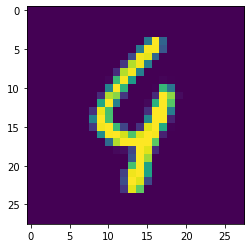

2 4


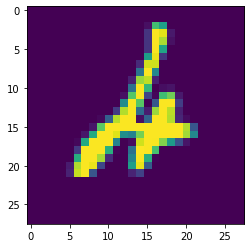

4 9


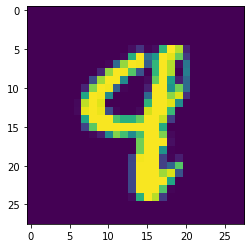

0 6


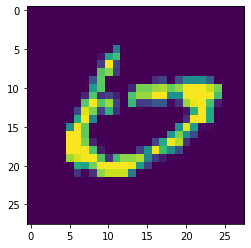

5 3


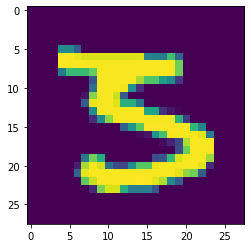

0 8


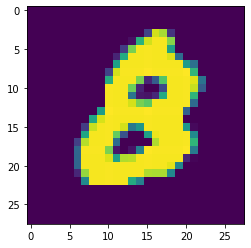

2 8


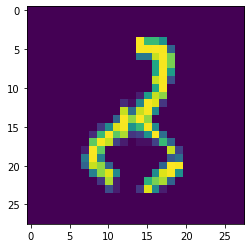

1 2


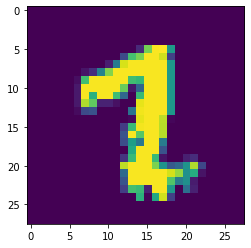

7 1


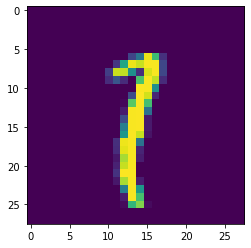

9 8


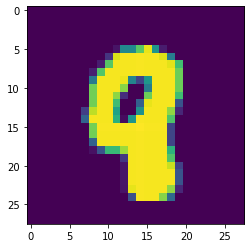

5 6


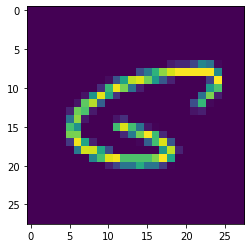

1 7


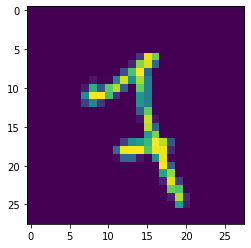

6 4


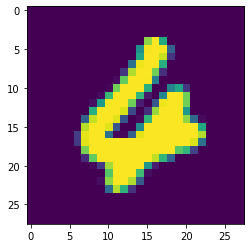

2 7


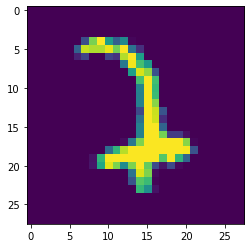

4 9


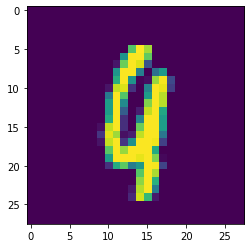

0 9


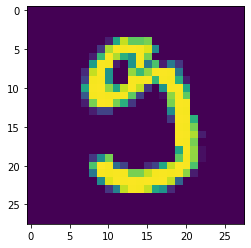

1 7


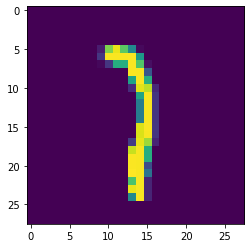

7 5


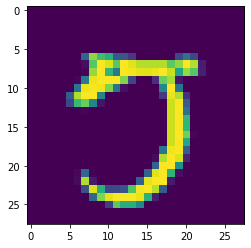

6 0


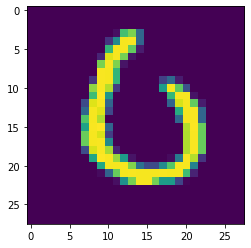

3 2


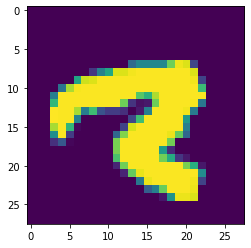

3 8


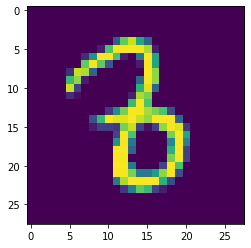

4 9


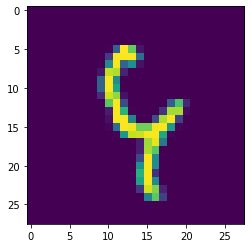

9 7


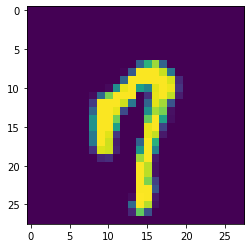

9 4


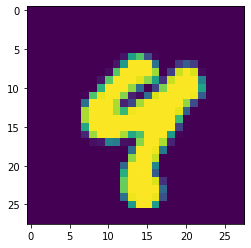

1 6


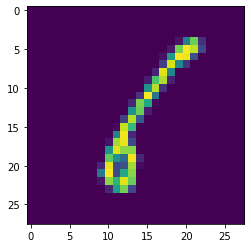

2 7


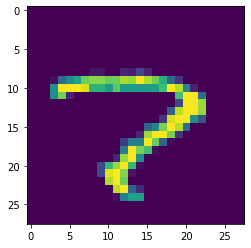

0 9


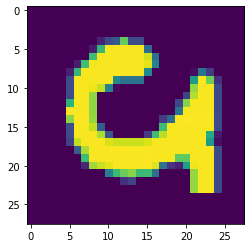

9 7


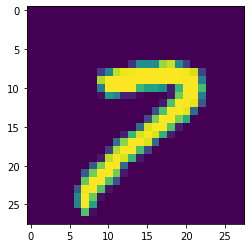

0 2


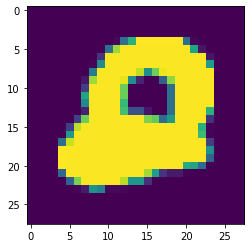

5 3


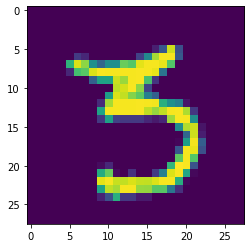

3 5


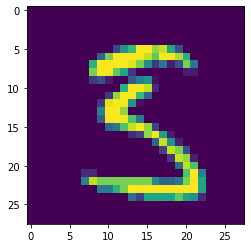

1 6


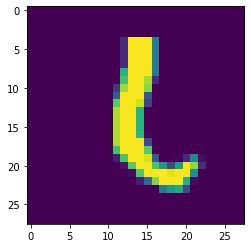

8 4


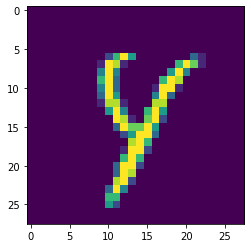

0 8


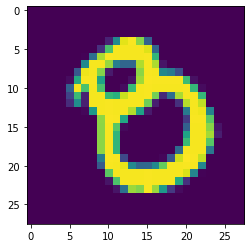

5 3


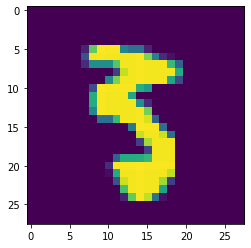

8 6


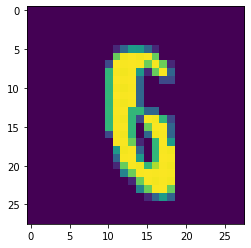

0 6


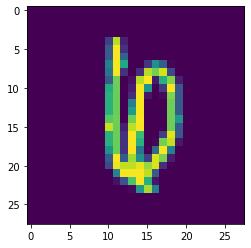

1 7


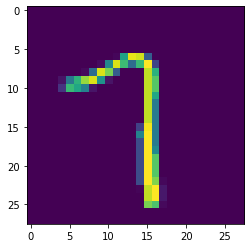

9 4


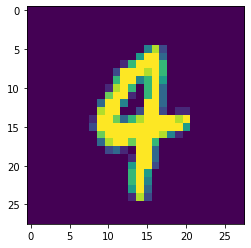

0 6


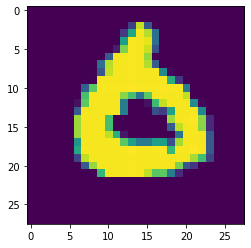

7 3


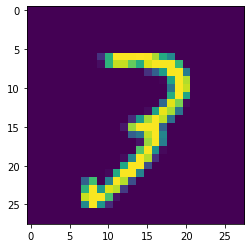

5 6


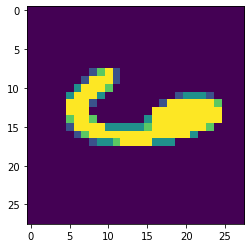

3 8


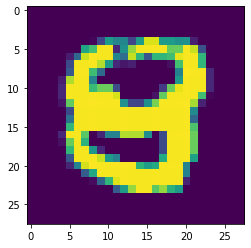

2 7


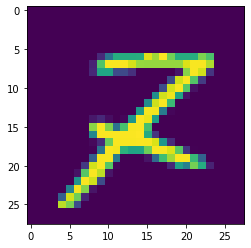

1 7


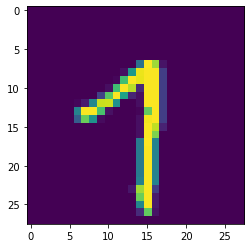

7 2


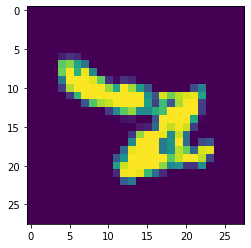

7 1


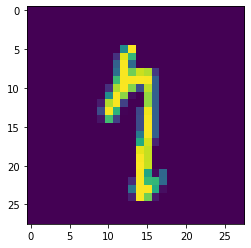

1 6


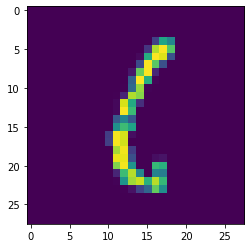

4 9


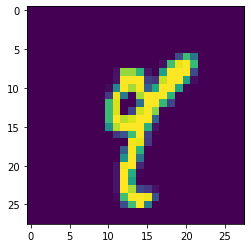

0 6


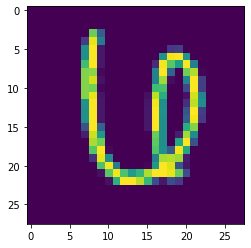

3 2


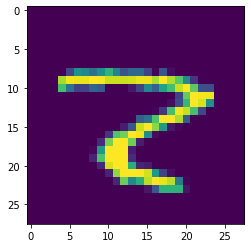

3 2


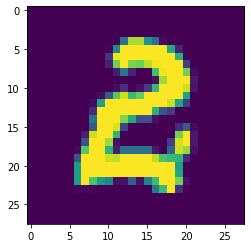

3 5


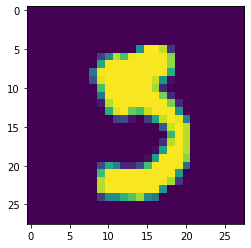

5 9


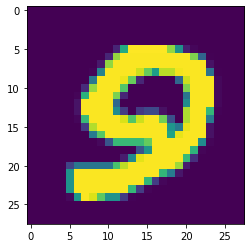

3 9


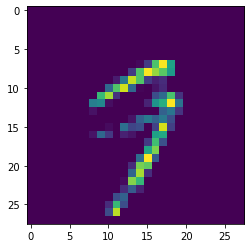

1 7


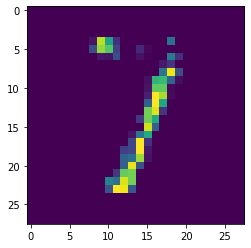

7 0


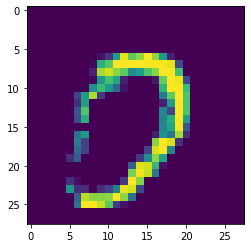

2 8


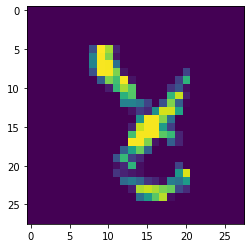

2 3


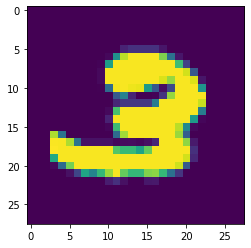

0 8


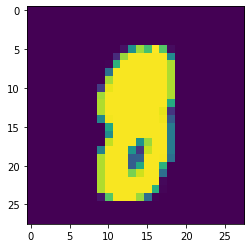

5 3


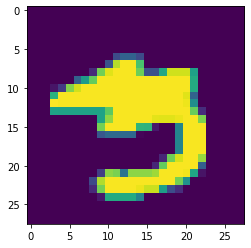

2 7


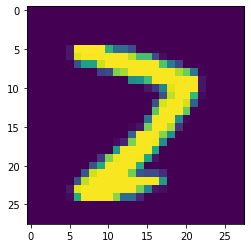

5 8


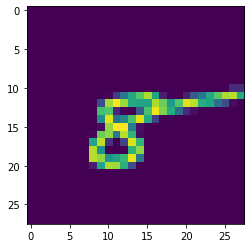

2 7


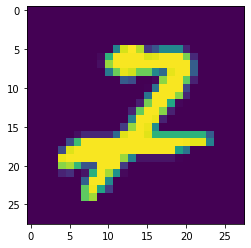

7 9


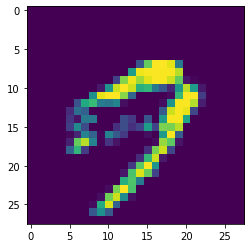

7 9


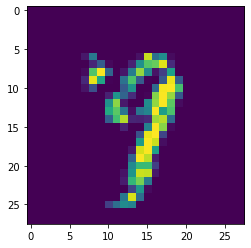

6 5


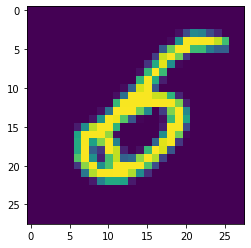

0 5


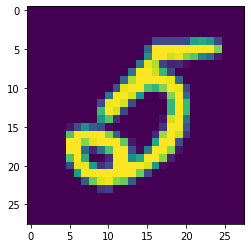

9 4


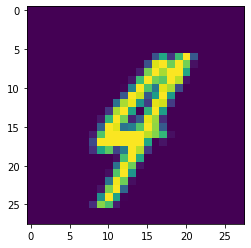

In [37]:
PROBABILITY1 = model(DATA1).numpy()
LABEL1 = PROBABILITY1.argmax(1)
for LABEL, TARGET, DATA in zip(LABEL1, TARGET1, DATA1):
    if LABEL != TARGET:
        print(LABEL, TARGET)
        DATA = DATA.reshape(28, 28)
        plt.imshow(DATA)
        plt.show()